In [1]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1MB 18.7MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp37-none-any.whl size=2115442 sha256=510a3414fd391a25d58faf3d3b98357f0243dd7e449c72279ca7fc80c9a1cff5
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images[0])
print(train_labels[0])

11493376/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

In [3]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = train_labels.astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = test_labels.astype(np.int64)

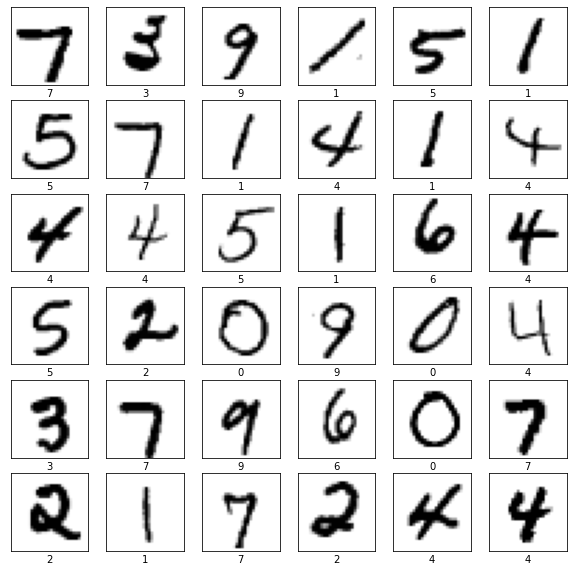

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [5]:
from tensorflow.keras import activations

def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=activations.relu),
      tf.keras.layers.Dense(10, activation=activations.softmax)
  ])
  return fc_model

model = build_fc_model()

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.8446
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2166 - accuracy: 0.9383
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1531 - accuracy: 0.9565
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1238 - accuracy: 0.9646
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1074 - accuracy: 0.9700


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('Test accuracy: ', test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9684
Test accuracy:  0.9684000015258789


In [9]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(24, 3, activation=activations.relu),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D(36, 3, activation=activations.relu),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=activations.relu),
      tf.keras.layers.Dense(10, activation=activations.softmax),
  ])
  return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [10]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3995 - accuracy: 0.8840
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0604 - accuracy: 0.9819
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0382 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0219 - accuracy: 0.9934


In [12]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('Test accuracy: ', test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9914
Test accuracy:  0.9914000034332275


In [13]:
predictions = cnn_model.predict(test_images)

In [14]:
predictions[0]

array([3.00805247e-08, 1.07841316e-07, 5.62091849e-08, 1.70538096e-05,
       2.17340967e-09, 3.42011191e-07, 2.34526179e-12, 9.99978542e-01,
       6.41390841e-07, 3.14758154e-06], dtype=float32)

In [15]:
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


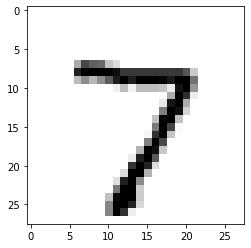

In [16]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

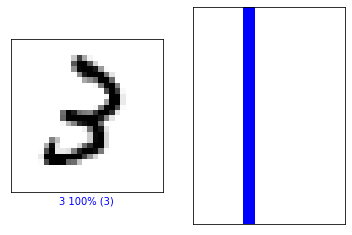

In [17]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 63 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

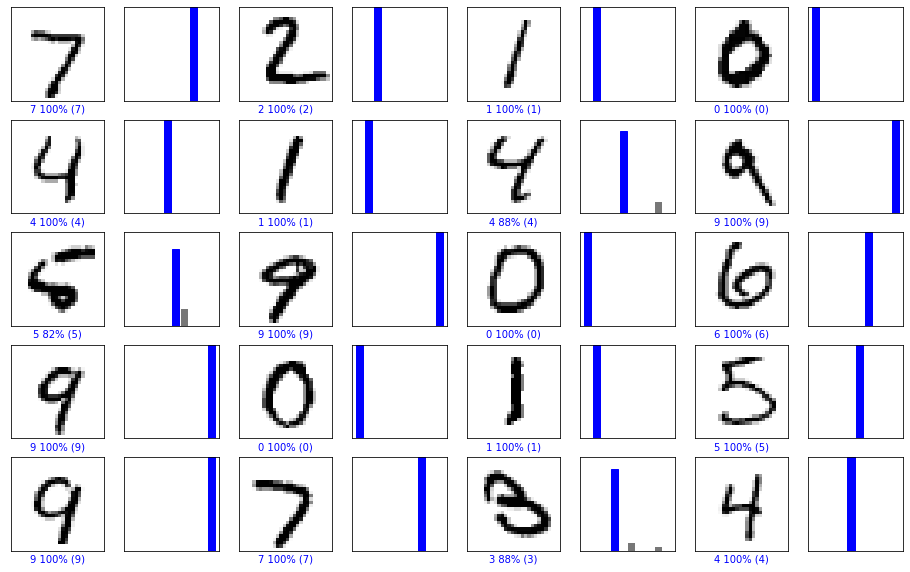

In [18]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

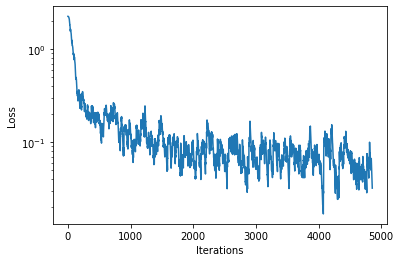

100%|██████████| 5000/5000 [00:34<00:00, 143.82it/s]


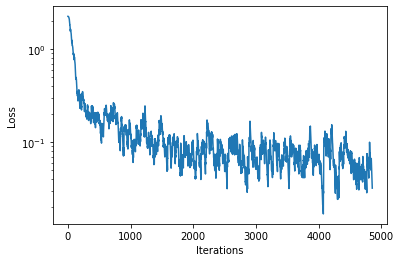

In [19]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))